In [2]:
# Environment: local-llm

from pydantic import BaseModel, Field
from langgraph.graph import StateGraph
from IPython.display import Image, display
from functools import reduce


# Example 1

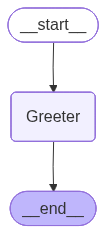

Hello World, how can I assist you today?


In [ ]:
class AgentState(BaseModel):# Our agent state schema
   message: str = Field(default="Hello", description="The current message from the agent.")

def greeting_node(state: AgentState) -> AgentState:
    """
    A simple node that adds a greeting message to the agent state.
    """
    state.message = "Hello " + state.message + ", how can I assist you today?"
    return state

graph = StateGraph(AgentState)
graph.add_node("Greeter", greeting_node)

graph.set_entry_point("Greeter")
graph.set_finish_point("Greeter")

app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))


if __name__ == "__main__":
    result = app.invoke({"message": "World"})
    print(result['message'])


# Example 2

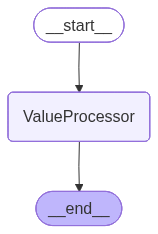

{'values': [10, 20, 30], 'name': 'Alice', 'result': 'Hi Alice, the total sum of values is 60. '}


In [ ]:
class AgentState(BaseModel):# Our agent state schema
    values : list[int] = Field(default=[], description="A list of integer values.")
    name : str = Field(default="User", description="The name of the user.")
    result : str = Field(default="", description="The result message.")

def process_values(state: AgentState) -> AgentState:
    """
    This node handles multiple inputs and update the result in the agent state.
    """
    total = sum(state.values)
    state.result = f"Hi {state.name}, the total sum of values is {total}."
    return state

graph = StateGraph(AgentState)
graph.add_node("ValueProcessor", process_values)
graph.set_entry_point("ValueProcessor")
graph.set_finish_point("ValueProcessor")

app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

if __name__ == "__main__":
    result_app = app.invoke({"values": [10, 20, 30], "name": "Alice"})
    print(result_app)


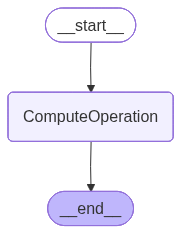

Hi Jack, as per your requested operation: * on [1.1, 2, 3, 4], Output: 26.400000000000002


In [41]:
class AgentState(BaseModel):# Our agent's state schema
    name : str = Field(default="User", description="The name of the user.")
    values : list[int | float] = Field(default = [], description = "A list of numeric values.")
    operation : str = Field(default = "+", description="The operation to perform: +, *.")
    output : str = Field(default = "",  description = "The string final output")

def compute_operation(state: AgentState) -> AgentState:
    """
    This is a node to perfom conditional operations based on user input, within a Langgraph ecosystem.
    """
    required_operation_ = state.operation
    vals_ = state.values
    if required_operation_ == "+":
        op_ = sum(vals_)
    elif required_operation_ == "*":
        op_ = reduce(lambda x,y: x*y, vals_)

    state.output = f"Hi {state.name}, as per your requested operation: {state.operation} on {state.values}, Output: {op_}"

    return state

graph = StateGraph(AgentState)
graph.add_node("ComputeOperation", compute_operation)
graph.set_entry_point("ComputeOperation")
graph.set_finish_point("ComputeOperation")

app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

if __name__ == "__main__":
    result_ = app.invoke({"name": "Jack", "values":[1.1,2,3,4], "operation": "*"})
    print(result_['output'])


# Example 3

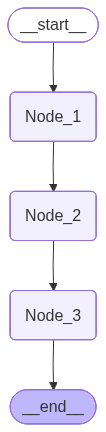

Jack, welcome to the system! You are 31 years old! You have skills: Python, Machine Learning, LangGraphs etc.


In [51]:
class AgentState(BaseModel):
    name : str = Field(default= "User", description = "Name of the user.")
    age : int = Field(default = 18, gt = 18 ,lt = 100, description = "Age of the user, whihc should be atleast 18")
    skills : list[str] = Field(default = [], description= "List of acquired skills.")
    output : str = Field(default = '', description = "Output resultant string.")

def first_node(state: AgentState) -> AgentState:
    '''
    This is the first node in the graph.
    '''
    state.output = state.output + f"{state.name}, welcome to the system!"
    return state

def second_node(state: AgentState) -> AgentState:
    '''
    This is the second node in the graph.
    '''
    state.output = state.output + f" You are {state.age} years old!"
    return state

def third_node(state: AgentState) -> AgentState:
    '''This is the third node in the graph'''
    skills_str_ = ", ".join(state.skills)
    state.output = state.output + f" You have skills: {skills_str_} etc."
    return state

graph = StateGraph(AgentState)
graph.add_node('Node_1', first_node)
graph.add_node('Node_2', second_node)
graph.add_node('Node_3', third_node)

graph.set_entry_point('Node_1')
graph.add_edge('Node_1', 'Node_2')
graph.add_edge('Node_2', 'Node_3')
graph.set_finish_point('Node_3')

app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

if __name__ == "__main__":
    result_ = app.invoke({"name": "Jack", "age":31, "skills": ['Python', 'Machine Learning', 'LangGraphs' ]})
    print(result_['output'])


# Example 4 (Conditional Edge)

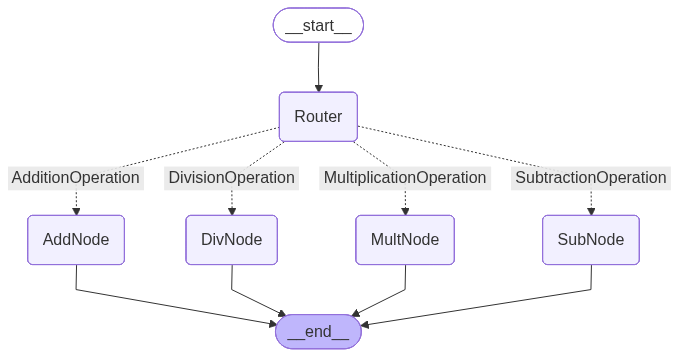

10


In [61]:
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from functools import reduce

class AgentState(BaseModel):
    number1: int|float = Field(default = 0.0, description = "Input 1")
    number2: int|float = Field(default = 0.1, gt = 0, description = "Input 2")
    operation: str = Field(default="+", description = "Addition or subtraction or division or multiplication.")
    finalnumber: float = Field(default = 1, description="Final output of the graph.")

def adder(state : AgentState) -> AgentState:
    '''Perform Addition'''
    state.finalnumber = state.number1 + state.number2
    return state

def subtractor(state : AgentState) -> AgentState:
    '''Perform Subtraction'''
    state.finalnumber = abs(state.number1 - state.number2)
    return state 

def multiplier(state : AgentState) -> AgentState:
    '''Perform Multiplication'''
    state.finalnumber = state.number1 * state.number2
    return state

def divisor(state: AgentState) -> AgentState:
    '''Perform Divison'''
    state.finalnumber = state.number1 / state.number2
    return state


def choose_next_node(state: AgentState) -> AgentState:
    '''This node will select next node of the graph'''
    if state.operation == "+":
        return "AdditionOperation" #edge name
    elif state.operation == '-':
        return "SubtractionOperation" #edge name
    elif state.operation == '*':
        return "MultiplicationOperation" #edge name
    elif state.operation == '/':
        return "DivisionOperation" #edge name
    

graph = StateGraph(AgentState)

graph.add_node("AddNode", adder)
graph.add_node("SubNode", subtractor)
graph.add_node("MultNode", multiplier)
graph.add_node("DivNode", divisor)
graph.add_node('Router', lambda state:state) ##passthrough function

graph.add_edge(START, 'Router')
graph.add_conditional_edges(
    'Router',
    choose_next_node,

    {
        #"Edge Name": "node"
        "AdditionOperation": "AddNode",
        "SubtractionOperation": "SubNode",
        "MultiplicationOperation": "MultNode",
        "DivisionOperation": "DivNode"

    }

)

graph.add_edge('AddNode', END)
graph.add_edge('SubNode', END)
graph.add_edge('MultNode', END)
graph.add_edge('DivNode', END)


app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

if __name__ == '__main__':
    result = app.invoke({"number1": 10, "number2": 20, "operation": "-"})
    print(result['finalnumber'])



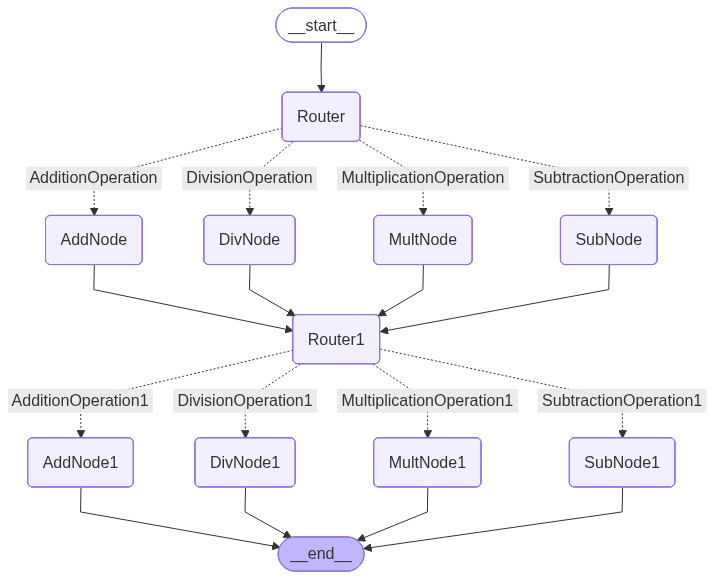

210.0 1.2


In [66]:
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from functools import reduce

class AgentState(BaseModel):
    number1: int|float = Field(default = 0.0, description = "Input 1")
    number2: int|float = Field(default = 0.1, gt = 0, description = "Input 2")
    operation: str = Field(default="+", description = "Addition or subtraction or division or multiplication.")
    finalnumber: float = Field(default = 1, description="Final output of the graph.")
    number3: int|float = Field(default = 0.0, description = "Input 3")
    number4: int|float = Field(default = 0.1, gt = 0, description = "Input 4")
    finalnumber1: float = Field(default = 1, description="Final output of the graph.")

# Stage: 1
def adder(state : AgentState) -> AgentState:
    '''Perform Addition'''
    state.finalnumber = state.number1 + state.number2
    return state

def subtractor(state : AgentState) -> AgentState:
    '''Perform Subtraction'''
    state.finalnumber = abs(state.number1 - state.number2)
    return state 

def multiplier(state : AgentState) -> AgentState:
    '''Perform Multiplication'''
    state.finalnumber = state.number1 * state.number2
    return state

def divisor(state: AgentState) -> AgentState:
    '''Perform Divison'''
    state.finalnumber = state.number1 / state.number2
    return state


def choose_next_node(state: AgentState) -> AgentState:
    '''This node will select next node of the graph'''
    if state.operation == "+":
        return "AdditionOperation" #edge name
    elif state.operation == '-':
        return "SubtractionOperation" #edge name
    elif state.operation == '*':
        return "MultiplicationOperation" #edge name
    elif state.operation == '/':
        return "DivisionOperation" #edge name
    
#Stage: 2
def adder1(state : AgentState) -> AgentState:
    '''Perform Addition'''
    state.finalnumber1 = state.number3 + state.number4
    return state

def subtractor1(state : AgentState) -> AgentState:
    '''Perform Subtraction'''
    state.finalnumber1 = abs(state.number3 - state.number4)
    return state 

def multiplier1(state : AgentState) -> AgentState:
    '''Perform Multiplication'''
    state.finalnumber1 = state.number3 * state.number4
    return state

def divisor1(state: AgentState) -> AgentState:
    '''Perform Divison'''
    state.finalnumber1 = state.number3 / state.number4
    return state


def choose_next_node1(state: AgentState) -> AgentState:
    '''This node will select next node of the graph'''
    if 0 < state.finalnumber <= 70:
        return "AdditionOperation1" #edge name
    elif 70 < state.finalnumber <= 100:
        return "SubtractionOperation1" #edge name
    elif 100 < state.finalnumber <= 200:
        return "MultiplicationOperation1" #edge name
    elif  state.finalnumber > 200 :
        return "DivisionOperation1" #edge name
    

graph = StateGraph(AgentState)

graph.add_node("AddNode", adder)
graph.add_node("SubNode", subtractor)
graph.add_node("MultNode", multiplier)
graph.add_node("DivNode", divisor)
graph.add_node('Router', lambda state:state) ##passthrough function

graph.add_node("AddNode1", adder1)
graph.add_node("SubNode1", subtractor1)
graph.add_node("MultNode1", multiplier1)
graph.add_node("DivNode1", divisor1)
graph.add_node('Router1', lambda state:state) ##passthrough function

graph.add_edge(START, 'Router')
graph.add_conditional_edges(
    'Router',
    choose_next_node,

    {
        #"Edge Name": "node"
        "AdditionOperation": "AddNode",
        "SubtractionOperation": "SubNode",
        "MultiplicationOperation": "MultNode",
        "DivisionOperation": "DivNode"

    }

)

graph.add_edge('AddNode', 'Router1')
graph.add_edge('SubNode', 'Router1')
graph.add_edge('MultNode', 'Router1')
graph.add_edge('DivNode', 'Router1')

graph.add_conditional_edges(
    'Router1',
    choose_next_node1,

    {
        #"Edge Name": "node"
        "AdditionOperation1": "AddNode1",
        "SubtractionOperation1": "SubNode1",
        "MultiplicationOperation1": "MultNode1",
        "DivisionOperation1": "DivNode1"

    }

)


graph.add_edge('AddNode1', END)
graph.add_edge('SubNode1', END)
graph.add_edge('MultNode1', END)
graph.add_edge('DivNode1', END)


app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

if __name__ == '__main__':
    result = app.invoke({"number1": 10, "number2": 21, "operation": "*", "number3": 12, "number4": 10, "operation1": "*"})
    print(result['finalnumber'], result['finalnumber1'])



# Example 5

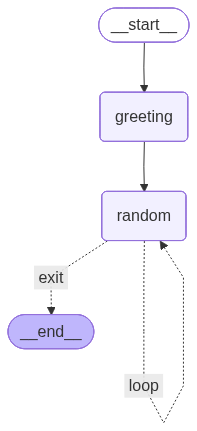

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there, Vaibhav', 'number': [1, 7, 0, 2, 4], 'counter': 5}

In [87]:
from pydantic import BaseModel, Field
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from functools import reduce
import random

class AgentState(BaseModel):
    name: str
    number: list[int]
    counter: int = Field(default = 0)


def greeting_node(state: AgentState) -> AgentState:
    """Greeting Node which says hi to the person"""
    state.name= f"Hi there, {state.name}"
    state.counter = 0 

    return state

def random_node(state: AgentState) -> AgentState:
    """Generates a random number from 0 to 10"""
    state.number.append(random.randint(0, 10))
    state.counter += 1

    return state

def should_continue(state: AgentState) -> AgentState:
    """Function to decide what to do next"""
    if state.counter < 5:
        print("ENTERING LOOP", state.counter)
        return "loop"  # Continue looping
    else:
        return "exit"  # Exit the loop
    
graph = StateGraph(AgentState)

graph.add_node("greeting", greeting_node)
graph.add_node("random", random_node)
graph.add_edge("greeting", "random")


graph.add_conditional_edges(
    "random",     # Source node
    should_continue, # Action
    {
        "loop": "random",  
        "exit": END          
    }
)

graph.set_entry_point("greeting")

app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))

app.invoke({"name":"Vaibhav", "number":[], "counter":-100})

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there, Vaibhav', 'number': [8, 3, 8, 6, 3], 'counter': 5}

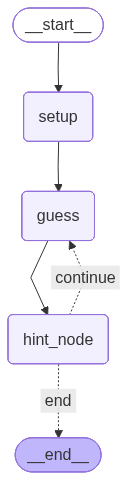

Attempt 1: Guessing 2 (Current range: 1-20)
Hint: The number 2 is too low. Try higher!
Continue: 1/7 remaining
Attempt 2: Guessing 8 (Current range: 3-20)
Hint: The number 8 is too high. Try lower!
Continue: 2/7 remaining
Attempt 3: Guessing 5 (Current range: 3-7)
Hint: The number 5 is too low. Try higher!
Continue: 3/7 remaining
Attempt 4: Guessing 6 (Current range: 6-7)
Hint: The number 6 is too low. Try higher!
Continue: 4/7 remaining
Attempt 5: Guessing 7 (Current range: 7-7)
Success! Correct! You found the number 7 in 5 attempts.
Game over!! Number found.
{'name': 'Player', 'guesses': [2, 8, 5, 6, 7], 'attempts': 5, 'lower_bound': 7, 'upper_bound': 7, 'hint': 'Correct! You found the number 7 in 5 attempts.', 'target_val': 7}


In [88]:
class AgentState(BaseModel):
    name: str = Field(default='Player', description = 'name of the player.')
    guesses: list[int] = Field(default = [],description= 'to store the guesses.')
    attempts: int = Field(default = 0, description= 'keep track of number of guesses')
    lower_bound: int = Field(default=1, ge = 1, description='lower bound')
    upper_bound: int = Field(default = 20, le=20, description = 'upper bound')
    hint: str = Field(default= '', description='give hint' )
    target_val: int = Field(default = 7, description = "the value to guess")
    

def setup(state: AgentState) -> AgentState:
    '''Setup the game'''
    state.hint = f"Hey {state.name}, up for a game!! I am thinking of a number between {state.lower_bound} and {state.upper_bound}."
    return state


def guess(state: AgentState) -> AgentState:
    '''Guess the number.'''
    possible_guesses = [i for i in range(state.lower_bound, state.upper_bound +1) if i not in state.guesses]

    if possible_guesses:
        guess_ = random.choice(possible_guesses)
    else:
        guess_ = random.choice(state.lower_bound, state.upper_bound)

    state.guesses.append(guess_)
    state.attempts +=1
    print(f"Attempt {state.attempts}: Guessing {guess_} (Current range: {state.lower_bound}-{state.upper_bound})")
    return state

def hint_node(state: AgentState) -> AgentState:
    '''Provide hint'''
    latest_guess = state.guesses[-1]
    target = state.target_val
    
    if latest_guess < target:
        state.hint = f"The number {latest_guess} is too low. Try higher!"
        
        state.lower_bound = max(state.lower_bound, latest_guess + 1)
        print(f"Hint: {state.hint}")
        
    elif latest_guess > target:
        state.hint = f"The number {latest_guess} is too high. Try lower!"
      
        state.upper_bound = min(state.upper_bound, latest_guess - 1)
        print(f"Hint: {state.hint}")
    else:
        state.hint = f"Correct! You found the number {target} in {state.attempts} attempts."
        print(f"Success! {state.hint}")
    
    return state


def should_continue(state: AgentState) -> AgentState:
    '''Determine if we should continue guessing or end the game.'''
    latest_guess = state.guesses[-1]
    if latest_guess == state.target_val:
        print(f"Game over!! Number found.")
        return "end"
    elif state.attempts > 7:
        print("Game Over: Maximum attempts reached!!!")
        return "end"
    else:
        print(f"Continue: {state.attempts}/7 remaining")
        return "continue"
    
graph = StateGraph(AgentState)
graph.add_node("setup", setup)
graph.add_node("guess", guess)
graph.add_node("hint_node", hint_node)  


graph.add_edge("setup", "guess")
graph.add_edge("guess", "hint_node")  


graph.add_conditional_edges(
    "hint_node", 
    should_continue,
    {
        "continue": "guess",
        "end": END
    }
)

graph.set_entry_point("setup")
app = graph.compile()
display(Image(app.get_graph().draw_mermaid_png()))
result = app.invoke({})
print(result)

# AI Agent 1

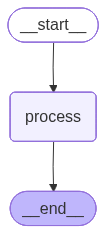

In [3]:
from langgraph.graph import StateGraph, END
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage
from langgraph.graph import StateGraph, START, END
from pydantic import BaseModel


class AgentState(BaseModel):
    messages: list[HumanMessage]

llm = ChatOllama(
    model="llama3", # or "mistral", "gemma", etc.
    temperature=0,
)

def process(state: AgentState) -> AgentState:
    response = llm.invoke(state["messages"])
    print(f"\nAI: {response.content}")
    return state

graph = StateGraph(AgentState)
graph.add_node("process", process)
graph.add_edge(START, "process")
graph.add_edge("process", END) 
agent = graph.compile()

display(Image(agent.get_graph().draw_mermaid_png()))

# user_input = input("Enter: ")
# while user_input != "exit":
#     agent.invoke({"messages": [HumanMessage(content=user_input)]})
#     user_input = input("Enter: ")

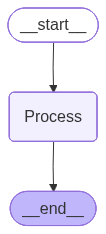

In [ ]:
from langgraph.graph import StateGraph, END
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph, START, END
from pydantic import BaseModel, Field
from typing import Union, List


llm = ChatOllama(
    model="llama3", # or "mistral", "gemma", etc.
    temperature=0,
)

class AgentState(BaseModel):
    messages: List[Union[HumanMessage, AIMessage ]]

def process(state: AgentState) -> AgentState:
    '''This node will help interact with the LLM'''
    response = llm.invoke(state.messages)
    state.messages.append(AIMessage(content = response.content))
    print(f"\nAI: {response.content}")
    return state

graph = StateGraph(AgentState)
graph.add_node("Process", process)
graph.add_edge(START, "Process")
graph.add_edge("Process", END)
agent = graph.compile()
display(Image(agent.get_graph().draw_mermaid_png()))



In [7]:
from typing import Annotated, Sequence, TypedDict
from dotenv import load_dotenv  
from langchain_core.messages import BaseMessage # The foundational class for all message types in LangGraph
from langchain_core.messages import ToolMessage # Passes data back to LLM after it calls a tool such as the content and the tool_call_id
from langchain_core.messages import SystemMessage # Message for providing instructions to the LLM
from langchain_ollama import ChatOllama
from langchain_core.tools import tool
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode

In [11]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [14]:
from langchain_openai import ChatOpenAI

ImportError: cannot import name 'ModelProfileRegistry' from 'langchain_core.language_models' (c:\Users\arind\anaconda3\envs\local-llm\lib\site-packages\langchain_core\language_models\__init__.py)